In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import re

In [2]:
data = pd.read_csv('BalanceSheetDataSet.csv')
df = data.copy()

In [3]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    # print("Veri setinin ilk 5 satırı")
    # display(HTML(df.head().to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (715, 226)
------------------------------------------------------
Veri seti değişken tipleri:
 ŞirketID                                                                                             int64
yıl                                                                                                  int64
ay                                                                                                   int64
Dönem Net Kar/Zararı                                                                                 int64
Nakit ve Nakit Benzerleri                                                                            int64
                                                                                                     ...  
Vergi İadeleri (Ödemeleri).2                                                                         int64
Diğer Nakit Girişleri (Çıkışları).2                                               

,ŞirketID,yıl,ay,Dönem Net Kar/Zararı,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Türkiye Cumhuriyet Merkez Bankası Hesabı,Diğer Alacaklar,Müşteri Sözleşmelerinden Doğan Varlıklar,İmtiyaz Sözleşmelerine İlişkin Finansal Varlıklar,Türev Araçlar,Stoklar,Peşin Ödenmiş Giderler,Cari Dönem Vergisiyle İlgili Varlıklar,Diğer Dönen Varlıklar,Satış Amacıyla Elde Tutulan Duran Varlıklar,Toplam Dönen Varlıklar,Finansal Yatırımlar.1,"İştirakler, İş Ortaklıkları ve Bağlı Ortaklıklardaki Yatırımlar",Ticari Alacaklar.1,Finans Sektörü Faaliyetlerinden Alacaklar.1,Diğer Alacaklar.1,Müşteri Sözleşmelerinden Doğan Varlıklar.1,İmtiyaz Sözleşmelerine İlişkin Finansal Varlıklar.1,Türev Araçlar.1,Özkaynak Yöntemiyle Değerlenen Yatırımlar,Yatırım Amaçlı Gayrimenkuller,Maddi Duran Varlıklar,Kullanım Hakkı Varlıkları,Maddi Olmayan Duran Varlıklar,Peşin Ödenmiş Giderler.1,Ertelenmiş Vergi Varlığı,Diğer Duran Varlıklar,Toplam Duran Varlıklar,Toplam Varlıklar,Finansal Borçlar,Diğer Finansal Yükümlülükler,Ticari Borçlar,Finans Sektörü Faaliyetlerinden Borçlar,Çalışanlara Sağlanan Faydalar Kapsamında Borçlar,Diğer Borçlar,Müşteri Sözleşmelerinden Doğan Yükümlülükler,Türev Araçlar.2,Devlet Teşvik ve Yardımları,Ertelenmiş Gelirler,Dönem Karı Vergi Yükümlülüğü,Kısa Vadeli Karşılıklar,Diğer Kısa Vadeli Yükümlülükler,Satış Amaçlı Sınıflandırılan Varlık Gruplarına İlişkin Yükümlülükler,Toplam Kısa Vadeli Yükümlülükler,Finansal Borçlar.1,Diğer Finansal Yükümlülükler.1,Ticari Borçlar.1,Finans Sektörü Faaliyetlerinden Borçlar.1,Çalışanlara Sağlanan Faydalar Kapsamında Borçlar.1,Diğer Borçlar.1,Müşteri Sözleşmelerinden Doğan Yükümlülükler.1,Devlet Teşvik ve Yardımları.1,Özkaynak Yöntemiyle Değerlenen Yatırımlardan Yükümlülükler,Türev Araçlar.3,Ertelenmiş Gelirler.1,Uzun vadeli Karşılıklar,Cari Dönem Vergisiyle İlgili Borçlar,Ertelenmiş Vergi Yükümlülüğü,Diğer Uzun Vadeli Yükümlülükler,Toplam Uzun Vadeli Yükümlülükler,Ana Ortaklığa Ait Özkaynaklar,Ödenmiş Sermaye,Sermaye Düzeltme Farkları,Birleşme Denkleştirme Hesabı,Pay Sahiplerinin İlave Sermaye Katkıları,Sermaye Avansı,Geri Alınmış Paylar (-),Karşılıklı İştirak Sermaye Düzeltmesi (-),Paylara İlişkin Primler (İskontolar),Kar veya Zararda Yeniden Sınıflandırılmayacak Birikmiş Diğer Kapsamlı Gelirler (Giderler),Kar veya Zararda Yeniden Sınıflandırılacak Birikmiş Diğer Kapsamlı Gelirler (Giderler),Kardan Ayrılan Kısıtlanmış Yedekler,Diğer Özkaynak Payları,Diğer Yedekler,Ödenen Kar Payı Avansları (Net) (-),Geçmiş Yıllar Kar/Zararları,Azınlık Payları,Toplam Özkaynaklar,Toplam Kaynaklar,Hedge Dahil Net Yabancı Para Pozisyonu,Satış Gelirleri,Yurt İçi Satışlar,Yurt Dışı Satışlar,Satışların Maliyeti (-),Ticari Faaliyetlerden Brüt Kar (Zarar),"Faiz, Ücret, Prim, Komisyon ve Diğer Gelirler","Faiz, Ücret, Prim, Komisyon ve Diğer Giderler (-)",Finans Sektörü Faaliyetlerinden Brüt Kar (Zarar),Brüt Kar (Zarar),Genel Yönetim Giderleri (-),"Pazarlama, Satış ve Dağıtım Giderleri (-)",Araştırma ve Geliştirme Giderleri (-),Diğer Faaliyet Gelirleri,Diğer Faaliyet Giderleri (-),Faaliyet Karı (Zararı),Yatırım Faaliyetlerinden Gelirler,Yatırım Faaliyetlerinden Giderler (-),TFRS 9 Uyarınca Belirlenen Değer Düşüklüğü Kazançları (Zararları) ve Değer Düşüklüğü Zararlarının İptalleri,Özkaynak Yöntemiyle Değerlenen Yatırımların Karlarından (Zararlarından) Paylar,"İştirakler, Müşterek Kontrol Edilen İşletmeler ve Bağlı Ortaklıklardan Diğer Gelirler (Giderler)",Finansman Geliri (Gideri) Öncesi Faaliyet Karı (Zararı),(Esas Faaliyet Dışı) Finansal Gelirler,(Esas Faaliyet Dışı) Finansal Giderler (-),Net Parasal Pozisyon Kazançları (Kayıpları),Sürdürülen Faaliyetler Vergi Öncesi Karı (Zararı),Sürdürülen Faaliyetler Vergi Geliri (Gideri),Dönem Vergi Geliri (Gideri),Ertelenmiş Vergi Geliri (Gideri),Sürdürülen Faaliyetler Dönem Karı/Zararı,Durdurulan Faaliyetler Dönem Karı/Zararı,Dönem Karı (Zararı),Azınlık Payları.1,Ana Ortaklık Payları,Amortisman,İşletme Faaliyetlerinden Nakit Akışları,Dönem 

------------------------------------------------------


<Axes: >

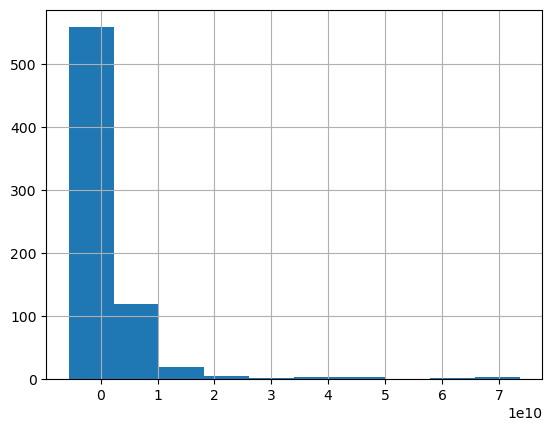

In [4]:
df["Dönem Net Kar/Zararı"].hist()


In [5]:
df.query("`Dönem Net Kar/Zararı`== 7.367500e+10")

,ŞirketID,yıl,ay,Dönem Net Kar/Zararı,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Türkiye Cumhuriyet Merkez Bankası Hesabı,Diğer Alacaklar,...,Türev Araçlardan Nakit Girişleri.1,Türev Araçlardan Nakit Çıkışları,Ödenen Temettüler,Ödenen Faiz.1,Alınan Faiz.2,Vergi İadeleri (Ödemeleri).2,Diğer Nakit Girişleri (Çıkışları).2,Yabancı Para Çevrim Farklarının Etkisinden Önce Nakit ve Nakit Benzerlerindeki Net Artış (Azalış),Yabancı Para Çevrim Farklarının Nakit ve Nakit Benzerleri Üzerindeki Etkisi,Nakit ve Nakit Benzerlerindeki Net Artış (Azalış)
687,24,2023,6,73675000000,212434000000,24647000000,106948000000,510922000000,144349000000,13525000000,...,0,5711000000,-17128000000,-8306000000,4902000000,0,-629000000,6922000000,47401000000,54323000000


Text(0.5, 1.0, 'Scatter Plot Başlığı')

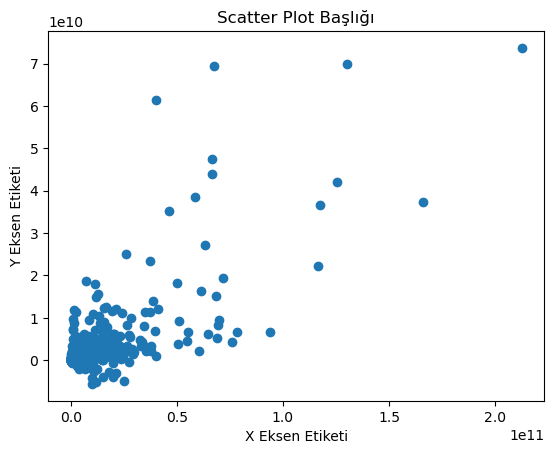

In [6]:
plt.scatter(df['Nakit ve Nakit Benzerleri'], df['Dönem Net Kar/Zararı'])

plt.xlabel('X Eksen Etiketi')
plt.ylabel('Y Eksen Etiketi')
plt.title('Scatter Plot Başlığı')


In [7]:
df["ŞirketID"].value_counts()

ŞirketID
0     29
11    29
23    29
22    29
21    29
19    29
18    29
15    29
14    29
1     29
12    29
10    29
9     29
4     29
3     29
13    28
8     28
7     28
16    28
17    28
6     28
5     28
20    28
2     28
24    28
Name: count, dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = df.dropna()

X, y = df.drop(columns=["Nakit ve Nakit Benzerleri"]), df["Dönem Net Kar/Zararı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf = model_random_forest.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Test R^2 Score:", r2_rf)

y_pred_train = model_random_forest.predict(X_train)

r2_rf_train = r2_score(y_train, y_pred_train)
print("Random Forest Train R^2 Score:", r2_rf_train)


R-squared: 1.0
Random Forest Test R^2 Score: 0.9201532273737457
Random Forest Train R^2 Score: 0.9928604497186072
